In [2]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from sklearn import preprocessing
from scipy.io import loadmat
from sklearn.model_selection import RepeatedKFold
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import math


C:\Users\EzgiOzgen\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# MAT 388E HW3

### Ezgi Özgen
### 090180344

## Q1

This is going to be an image classification problem. For this problem we are going to use [the corrected Indian Pines Dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines).

1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).
2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  

3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.
6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class? 

In [234]:
pine = loadmat('.\\Data\\Indian_pines_corrected.mat')['indian_pines_corrected']
pine_gt = loadmat('.\\Data\\Indian_pines_gt.mat')['indian_pines_gt']

**I checked the shape for x, y, I edited the shape so that we can process it.**

In [235]:
print(pine_gt.shape,pine.shape)
X = pine.reshape((145*145,200))
y = pine_gt.reshape(145*145)

(145, 145) (145, 145, 200)


**I looked at the unique classes to be able to classify, how many total. I checked there are classes**

In [236]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

**I did binary labeling with LabelBinarizer, so an array of 17 columns was formed.**

In [492]:
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y=lb.transform(y)

**You wanted 3 different models, I wrote them in a function that takes the dataframe and model abbreviation as input. I wrote the abbreviations of the models with the conditions and created the model according to the given condition. I split the cross validation to be 10 pieces and made the score accurate.**

In [238]:
def modelfun(X,y,model):
    if(model=='LR'):
        model = LogisticRegression(solver='lbfgs')
    elif (model=='SVC'):
        model = SVC(kernel='rbf',C=2.0)
    elif (model == 'KNN'):
        model = KNeighborsClassifier(n_neighbors = 7)
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    model.fit(X,y)
    return cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

**I gave the C value of 2 in the SVC model and rbf in the kernel and observed that it worked longer when I lowered the value of C.**

In [383]:
svc_model = pd.DataFrame()
for i in range(17):
    svc_model[f'{i}_class'] =(modelfun(X,y[:,i],'SVC'))
    

**Then I gave the 17 columns one by one to the model in the for loop. There were 170 printouts, but I took the average of them in every 17 classes.**

In [384]:
svc_model = svc_model.mean()
svc_model= pd.DataFrame(svc_model)

In [385]:
svc_model

,0
0_class,0.768656
1_class,0.997812
2_class,0.932081
3_class,0.960524
4_class,0.988728
5_class,0.977027
6_class,0.965280
7_class,0.998668
8_class,0.992390
9_class,0.999049


**I checked the confidence interval of the resulting accuracy scores. For this, I wrote the confidence interval method according to accuracy.**

In [391]:
list_upper=[]
list_lower=[]
for index,row in svc_model.iterrows():
    ci_length = 1.96* (row[0]* (1 - row[0])**(1/2) / 145)
    list_lower.append(row[0]-ci_length)
    list_upper.append(row[0]+ci_length)
svc_model['confidence_interval_lower_svc']=list_lower
svc_model['confidence_interval_upper_svc']=list_upper
svc_model

,confidence_interval_lower_svc,confidence_interval_upper_svc,SVC
0_class,0.758640,0.768677,0.768656
1_class,0.996466,0.997897,0.997812
2_class,0.925447,0.932147,0.932081
3_class,0.955288,0.960599,0.960524
4_class,0.985805,0.988812,0.988728
5_class,0.972943,0.977108,0.977027
6_class,0.960340,0.965357,0.965280
7_class,0.997599,0.998752,0.998668
8_class,0.989964,0.992475,0.992390
9_class,0.998133,0.999131,0.999049


**I applied the same method for svm in logistic regression.**

In [341]:
LR_model = pd.DataFrame()
for i in range(17):
    LR_model[f'{i}_class'] =(modelfun(X,y[:,i],'LR'))


C:\Users\EzgiOzgen\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EzgiOzgen\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

C:\Users\EzgiOzgen\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [342]:
LR_model = LR_model.mean()
LR_model= pd.DataFrame(LR_model)

In [376]:
list_upper=[]
list_lower=[]
for index,row in LR_model.iterrows():
    ci_length = 1.96* (row[0]* (1 - row[0])**(1/2) / 145)
    list_lower.append(row[0]-ci_length)
    list_upper.append(row[0]+ci_length)
LR_model['confidence_interval_lower_LR']=list_lower
LR_model['confidence_interval_upper_LR']=list_upper
LR_model

,confidence_interval_lower_LR,confidence_interval_upper_LR,LR
0_class,0.738565,0.748743,0.748727
1_class,0.998412,0.999321,0.999239
2_class,0.947450,0.953177,0.953103
3_class,0.957660,0.962835,0.962759
4_class,0.986340,0.989288,0.989203
5_class,0.984528,0.987671,0.987586
6_class,0.981675,0.985101,0.985018
7_class,0.997997,0.999037,0.998954
8_class,0.992232,0.994426,0.994340
9_class,0.997863,0.998942,0.998859


**I chose the same path in the Knn model. I gave the number of n_neighbors 7.**

In [344]:
KNN_model = pd.DataFrame()
for i in range(17):
    KNN_model[f'{i}_class'] =(modelfun(X,y[:,i],'KNN'))

    

In [345]:
Knn = KNN_model.mean()
Knn= pd.DataFrame(Knn)

In [373]:
list_upper=[]
list_lower=[]
for index,row in Knn.iterrows():
    ci_length = 1.96* (row[0]* (1 - row[0])**(1/2) / 145)
    list_lower.append(row[0]-ci_length)
    list_upper.append(row[0]+ci_length)
Knn['confidence_interval_lower_knn']=list_lower
Knn['confidence_interval_upper_knn']=list_upper
Knn

,confidence_interval_lower_knn,confidence_interval_upper_knn,Knn
0_class,0.802725,0.812303,0.812271
1_class,0.997087,0.998372,0.998288
2_class,0.947651,0.953367,0.953294
3_class,0.967049,0.971637,0.971558
4_class,0.986715,0.989621,0.989536
5_class,0.986126,0.989098,0.989013
6_class,0.975265,0.979249,0.979167
7_class,0.998703,0.999510,0.999429
8_class,0.991009,0.993379,0.993294
9_class,0.998133,0.999131,0.999049


**I gathered the 17-class outputs and confidence intervals of all models in a dataframe. I commented that Knn works best and the output of confidence intervals is nice too. I gathered the 17-class outputs and confidence intervals of all models in a dataframe. I commented that Knn works best and the output of confidence intervals is nice too. There is not much distinguishing difference between support vector and logistic regression, but there is a drop in some classes in the support vector model.**

In [392]:
final_model = pd.concat([svc_model, LR_model,Knn],axis=1)
final_model

,confidence_interval_lower_svc,confidence_interval_upper_svc,SVC,confidence_interval_lower_LR,confidence_interval_upper_LR,LR,confidence_interval_lower_knn,confidence_interval_upper_knn,Knn
0_class,0.758640,0.768677,0.768656,0.738565,0.748743,0.748727,0.802725,0.812303,0.812271
1_class,0.996466,0.997897,0.997812,0.998412,0.999321,0.999239,0.997087,0.998372,0.998288
2_class,0.925447,0.932147,0.932081,0.947450,0.953177,0.953103,0.947651,0.953367,0.953294
3_class,0.955288,0.960599,0.960524,0.957660,0.962835,0.962759,0.967049,0.971637,0.971558
4_class,0.985805,0.988812,0.988728,0.986340,0.989288,0.989203,0.986715,0.989621,0.989536
5_class,0.972943,0.977108,0.977027,0.984528,0.987671,0.987586,0.986126,0.989098,0.989013
6_class,0.960340,0.965357,0.965280,0.981675,0.985101,0.985018,0.975265,0.979249,0.979167
7_class,0.997599,0.998752,0.998668,0.997997,0.999037,0.998954,0.998703,0.999510,0.999429
8_class,0.989964,0.992475,0.992390,0.992232,0.994426,0.994340,0.991009,0.993379,0.993294
9_class,0.998133,0.999131,0.999049,0.997863,0.998942,0.998859,0.998133,0.999131,0.999049


## Q2

For this question, we are going to analyze some [NBA datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). Specifically, we look at the season 2018-2019.

In [231]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.
2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.
3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.
4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.
5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.
6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.

**I observed how many unique teams there are in total. To see how to create a 30x30 matrix**

In [22]:
NBA['PLAYER1_TEAM_ABBREVIATION'].unique()

array([nan, 'PHX', 'HOU', 'MEM', 'UTA', 'NYK', 'DAL', 'SAS', 'MIA', 'GSW',
       'CLE', 'NOP', 'DET', 'ATL', 'CHA', 'IND', 'TOR', 'WAS', 'OKC',
       'DEN', 'PHI', 'ORL', 'BKN', 'CHI', 'SAC', 'POR', 'BOS', 'MIN',
       'LAC', 'MIL', 'LAL'], dtype=object)

**I chose the three columns I would use**

In [4]:
nba = NBA[['PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER3_TEAM_ABBREVIATION']]
nba.shape

(582468, 3)

**I made groupby these lines according to the interactions they created with each other and got your size.**

In [6]:
group12 = nba.groupby(['PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION'], dropna=False).size().reset_index(name="Time")
group13 = nba.groupby(['PLAYER1_TEAM_ABBREVIATION', 'PLAYER3_TEAM_ABBREVIATION'], dropna=False).size().reset_index(name="Time")
group23 = nba.groupby(['PLAYER2_TEAM_ABBREVIATION', 'PLAYER3_TEAM_ABBREVIATION'], dropna=False).size().reset_index(name="Time")

**While the player 2.3 interaction was occurring, the player 3.2 interaction was occurring at the same time, I looked at all the 1-3 and 1-2 and 2-3 and 3-1 and 2-1 and 3-2 pivot_tables to see this interaction in the pivot table**

In [7]:
p23 =group23.pivot_table(index='PLAYER2_TEAM_ABBREVIATION', columns=['PLAYER3_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p23.fillna(0, inplace = True)
p32 =group23.pivot_table(index='PLAYER3_TEAM_ABBREVIATION', columns=['PLAYER2_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p32.fillna(0, inplace = True)
p12 = group12.pivot_table(index='PLAYER1_TEAM_ABBREVIATION', columns=['PLAYER2_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p12.fillna(0,inplace=True)
p21 = group12.pivot_table(index='PLAYER2_TEAM_ABBREVIATION', columns=['PLAYER1_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p21.fillna(0,inplace=True)
p31=group13.pivot_table(index='PLAYER3_TEAM_ABBREVIATION', columns=['PLAYER1_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p31.fillna(0,inplace=True)
p13 = group13.pivot_table(index='PLAYER1_TEAM_ABBREVIATION', columns=['PLAYER3_TEAM_ABBREVIATION'], values='Time',aggfunc='sum')
p13.fillna(0,inplace=True)

**Then I did (1vs 3) + (3 vs1 ) to find the sum, but I saw that the values of the same players, namely the diagonal, were doubled, as a solution, I added two pivot tables by adding there**

In [17]:
a=p12+p21- (np.identity(len(p12))*p21)
b=p13+p31- (np.identity(len(p13))*p31)
c=p32+p23- (np.identity(len(p32))*p23)
df_nba_final =a+b+c
df_nba_final 

PLAYER2_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,4670.0,246.0,337.0,298.0,321.0,225.0,164.0,156.0,237.0,146.0,...,156.0,298.0,300.0,161.0,144.0,154.0,132.0,218.0,155.0,308.0
BKN,246.0,4030.0,286.0,286.0,254.0,278.0,138.0,161.0,223.0,139.0,...,141.0,187.0,293.0,135.0,152.0,141.0,122.0,259.0,151.0,272.0
BOS,337.0,286.0,4247.0,261.0,171.0,250.0,128.0,129.0,284.0,147.0,...,153.0,178.0,263.0,155.0,115.0,138.0,105.0,281.0,146.0,188.0
CHA,298.0,286.0,261.0,3947.0,198.0,232.0,120.0,155.0,268.0,128.0,...,142.0,231.0,327.0,153.0,133.0,136.0,118.0,188.0,124.0,279.0
CHI,321.0,254.0,171.0,198.0,3594.0,242.0,149.0,125.0,248.0,150.0,...,184.0,249.0,242.0,134.0,110.0,140.0,118.0,269.0,132.0,280.0
CLE,225.0,278.0,250.0,232.0,242.0,3503.0,122.0,131.0,270.0,114.0,...,144.0,173.0,182.0,146.0,111.0,100.0,123.0,273.0,130.0,268.0
DAL,164.0,138.0,128.0,120.0,149.0,122.0,3945.0,198.0,139.0,266.0,...,291.0,112.0,129.0,302.0,287.0,204.0,252.0,146.0,305.0,133.0
DEN,156.0,161.0,129.0,155.0,125.0,131.0,198.0,4177.0,126.0,304.0,...,305.0,127.0,119.0,309.0,261.0,197.0,246.0,120.0,305.0,123.0
DET,237.0,223.0,284.0,268.0,248.0,270.0,139.0,126.0,3576.0,120.0,...,158.0,248.0,322.0,146.0,125.0,143.0,105.0,210.0,147.0,208.0


**I got a 30 vs 30 matrix. I clustered this matrix in two classes and gave linkage complete. 15-15 made a split**

In [494]:
hie_cluster12 = AgglomerativeClustering(n_clusters=2,linkage="complete") # bydefault metric eucliadean
hie_labels12 = hie_cluster12.fit_predict(df_nba_final)
unique, counts = np.unique(hie_labels12, return_counts=True)
dict(zip(unique, counts))

{0: 15, 1: 15}

**I observed that the members in the set of 1s belong to the western conference, and the members of the set of zeros belong to the eastern conference. As a result of the relationships of the teams, I have observed that they are clustered in the same conferences.**

In [229]:
np.where(hie_labels12 == 1)
df_nba_final.index[6],df_nba_final.index[7],df_nba_final.index[9],df_nba_final.index[10],df_nba_final.index[12],df_nba_final.index[13],df_nba_final.index[14],df_nba_final.index[17],df_nba_final.index[18],df_nba_final.index[20],df_nba_final.index[23],df_nba_final.index[24],df_nba_final.index[25],df_nba_final.index[26],df_nba_final.index[28]

('DAL',
 'DEN',
 'GSW',
 'HOU',
 'LAC',
 'LAL',
 'MEM',
 'MIN',
 'NOP',
 'OKC',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'UTA')

In [232]:
np.where(hie_labels12 == 0)
df_nba_final.index[0],df_nba_final.index[1],df_nba_final.index[2],df_nba_final.index[3],df_nba_final.index[4],df_nba_final.index[5],df_nba_final.index[8],df_nba_final.index[11],df_nba_final.index[15],df_nba_final.index[16],df_nba_final.index[19],df_nba_final.index[21],df_nba_final.index[22],df_nba_final.index[27],df_nba_final.index[29]

('ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DET',
 'IND',
 'MIA',
 'MIL',
 'NYK',
 'ORL',
 'PHI',
 'TOR',
 'WAS')

**I got the columns that I will use to cluster the players**

In [281]:
player = NBA[['PLAYER1_NAME', 'PLAYER2_NAME', 'PLAYER3_NAME']]
player.shape

(582468, 3)

In [495]:
#print(player['PLAYER1_NAME'].unique())

**Then I went to the solution from groupby size methods again to observe their interaction with each other.**

In [417]:
group12 = player.groupby(['PLAYER1_NAME', 'PLAYER2_NAME'], dropna=False).size().reset_index(name="Time")
group13 = player.groupby(['PLAYER1_NAME', 'PLAYER3_NAME'], dropna=False).size().reset_index(name="Time")
group23 = player.groupby(['PLAYER2_NAME', 'PLAYER3_NAME'], dropna=False).size().reset_index(name="Time")

**Again, as in the first question, I proceeded through the pivot_table. 1vs3 and 3vs1 and 1 vs 2 and 2 vs 1 and 3 vs 2 and 2 vs 3**

In [452]:
p23 =group23.pivot_table(index='PLAYER2_NAME', columns=['PLAYER3_NAME'], values='Time',aggfunc='sum', dropna=False)
p23.fillna(0, inplace = True)
p32 =group23.pivot_table(index='PLAYER3_NAME', columns=['PLAYER2_NAME'], values='Time',aggfunc='sum', dropna=False)
p32.fillna(0, inplace = True)
p12 = group12.pivot_table(index='PLAYER1_NAME', columns=['PLAYER2_NAME'], values='Time',aggfunc='sum', dropna=False)
p12.fillna(0,inplace=True)
p21 = group12.pivot_table(index='PLAYER2_NAME', columns=['PLAYER1_NAME'], values='Time',aggfunc='sum', dropna=False)
p21.fillna(0,inplace=True)
p31=group13.pivot_table(index='PLAYER3_NAME', columns=['PLAYER1_NAME'], values='Time',aggfunc='sum', dropna=False)
p31.fillna(0,inplace=True)
p13 = group13.pivot_table(index='PLAYER1_NAME', columns=['PLAYER3_NAME'], values='Time',aggfunc='sum', dropna=False)
p13.fillna(0,inplace=True)

**But this time, a matrix with unequal numbers of columns and rows came, I used the add function differently to add them. I used the fill_value property of this function to avoid unequal rows.**

In [465]:
a= p31.add(p13, fill_value=0)
b=p12.add(p21,fill_value=0)
c=p23.add(p32, fill_value=0)

In [466]:
a.fillna(0,inplace=True)
b.fillna(0,inplace=True)
c.fillna(0,inplace=True)

In [467]:
a= a.add(b, fill_value=0)

In [468]:
final = a.add(c,fill_value=0)

**I collected them in order because they were not collected all at once, then I created a dataframe called f for the final. I have given the interactions over 500 in this dataframe question as a condition.**

In [469]:
f = pd.DataFrame(final.sum())

In [471]:
f=f[f[0] > 500]
f

,0
Aaron Gordon,1727.0
Aaron Holiday,501.0
Al Horford,1588.0
Al-Farouq Aminu,1111.0
Alec Burks,856.0
...,...
Wilson Chandler,659.0
Yogi Ferrell,696.0
Zach Collins,1011.0
Zach LaVine,1464.0


**My resulting table was created in 2 dimensions. I used the ward method while creating the dendrogram, and since there are many players, I adjusted the sizes accordingly. I assigned the dataframe's index column to the labels to see the link of the players**

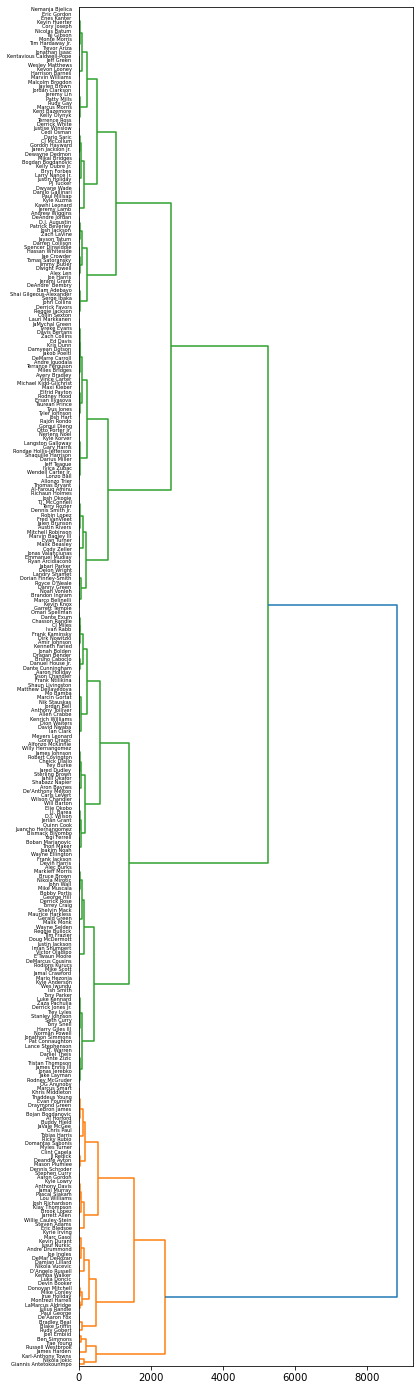

In [479]:
plt.figure(figsize=(6,25))
den = hc.dendrogram(hc.linkage(f, method='ward'), orientation='right',labels=f.index)

**I observed that five different groups would be ideal if we made a cut from the starting point of the dendrogram, and I set the number of clusters to 5 and again set the linkage value as ward.**

In [486]:
hie_player = AgglomerativeClustering(n_clusters=5,linkage="ward") 
player_label = hie_player.fit_predict(f)

C:\Users\EzgiOzgen\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**When I observed the distributions, I commented that it was not ideal but still distributed well. Few players were assigned to 4 clusters. When I looked at the players gathered in 4 clusters, I observed that the majority were the quarterbacks.**

In [487]:
unique, counts = np.unique(player_label, return_counts=True)
dict(zip(unique, counts))

{0: 58, 1: 73, 2: 112, 3: 69, 4: 8}

In [498]:
f["cluster"] = player_label
f[f["cluster"]==4]

<ipython-input-498-238e6929643e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["cluster"] = player_label


,0,cluster
Ben Simmons,2275.0,4
Giannis Antetokounmpo,2691.0,4
James Harden,2409.0,4
Joel Embiid,2270.0,4
Karl-Anthony Towns,2392.0,4
Nikola Jokic,2551.0,4
Russell Westbrook,2416.0,4
Trae Young,2320.0,4
